In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dta
#For correlation coefficient
import scipy.stats as st

In [4]:
#Read in csv file

CSV_path = "../clean_data_rs/airbnbFINAL_Swobabika.csv"

airbnbOccStart = pd.read_csv(CSV_path)
airbnbOccStart

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,15,94,9,10,94,9,9,9,0.15,5.205174
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,176,98,10,10,98,10,10,10,1.75,3.649571
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,44,97,10,10,97,10,9,10,0.60,5.437003
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,196,99,10,9,99,10,10,10,2.07,0.072335
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,43,95,9,10,95,10,10,9,0.46,2.794548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,30410904,127327853,Nathan,f,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,2,100,10,10,100,10,10,10,2.00,0.700146
9304,30468406,30322920,Robyn,f,1,"Brunswick West, VIC, Australia",Moreland,Brunswick West,Vic,3055,...,1,0,0,0,0,0,0,0,1.00,5.893982
9305,30470482,36410227,Sabrina,f,276,"Port Melbourne, Australia",Port Phillip,Port Melbourne,Vic,3207,...,1,0,0,0,0,0,0,0,1.00,3.780995
9306,30483362,154023219,Aishah,f,1,"Preston, VIC, Australia",Darebin,Preston,Vic,3072,...,1,0,0,0,0,0,0,0,1.00,8.746854


In [5]:
#List of columns
airbnbOccStart.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd'],
      dtype='object')

In [6]:
# Checking the number of records.
    #number of unique neighbourhoods

print("There are " + str(len(airbnbOccStart)) + " records in the dataframe")
    

print("There are " + str(len(airbnbOccStart["neighbourhood_cleansed"].unique())) +  " unique neighbourhoods in the dataframe")

There are 9308 records in the dataframe
There are 14 unique neighbourhoods in the dataframe


In [7]:
#determine if blank fields and datatypes
airbnbOccStart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9308 non-null   int64  
 1   host_id                      9308 non-null   int64  
 2   host_name                    9308 non-null   object 
 3   host_is_superhost            9308 non-null   object 
 4   host_total_listings_count    9308 non-null   int64  
 5   street                       9308 non-null   object 
 6   neighbourhood_cleansed       9308 non-null   object 
 7   city                         9308 non-null   object 
 8   state                        9308 non-null   object 
 9   zipcode                      9308 non-null   object 
 10  latitude                     9308 non-null   float64
 11  longitude                    9308 non-null   float64
 12  property_type                9308 non-null   object 
 13  accommodates      

### Neighbourhood Summary Table
Based on average reviews per month

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the rating for each Neighbourhood

# This method produces everything in a single groupby function
airbnbOccNeighGroup = airbnbOccStart.groupby(["neighbourhood_cleansed"])
airbnbOccsummary = airbnbOccNeighGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])
airbnbOccsummarysort = airbnbOccsummary.sort_values(by="mean", ascending=False) 

airbnb_Occupancy_Rate_Summary = airbnbOccsummarysort.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnb_Occupancy_Rate_Summary

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
neighbourhood_cleansed,,,,,
Melbourne,2.393389,1.910,4.081698,2.020321,0.030802
Brimbank,2.228000,2.410,0.093620,0.305974,0.136836
Moonee Valley,1.642816,1.100,2.546032,1.595629,0.157222
Yarra,1.461808,0.900,2.402773,1.550088,0.046843
Maribyrnong,1.457168,1.130,1.887780,1.373965,0.104461
Boroondara,1.367339,0.865,2.189023,1.479535,0.100207
Banyule,1.319298,1.000,1.849653,1.360020,0.180139
Port Phillip,1.316537,0.780,2.190362,1.479987,0.036805
Hobsons Bay,1.240286,0.835,2.096458,1.447915,0.173059


#### Neighbourhood Summary Table Observation
Stand outs are Melbourne and Brimbank with a similar mean
However Melbourne's median  differs from its mean and the variance is  large compared to the Brimbank.
Brimbank's standard deviation is also substantially lower than Melbourne.
Due to Melbourne's unpredictability, and the rest of the neighbourhoods being somewhat consistent Mean, it is benefical to break it down into cities (suburbs)

### City Summary Table Top 10
Based on average reviews per month

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the rating for each city

# This method produces everything in a single groupby function
airbnbOccCityGroup = airbnbOccStart.groupby(["city"])
airbnbOccCitysummary = airbnbOccCityGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])

airbnbOccCitysummary = airbnbOccCitysummary.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnbOccCitysummarysorttop = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=False)


airbnb_Occupancy_City_Rate_Summary_TopTen = airbnbOccCitysummarysorttop.head(10)

airbnb_Occupancy_City_Rate_Summary_TopTen



,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Brooklyn,7.830000,7.830,NaN,NaN,NaN
Hadfield,3.660000,3.660,NaN,NaN,NaN
Essendon North,3.020000,3.020,NaN,NaN,NaN
Melbourne,2.560937,2.070,4.220226,2.054319,0.039303
Heidelberg Heights,2.367143,2.630,4.890890,2.211536,0.835882
Docklands,2.366012,1.635,5.078946,2.253652,0.121157
West Melbourne,2.257986,2.000,2.911950,1.706444,0.144739
Airport West,2.255000,2.255,2.354450,1.534422,1.085000
Maribyrnong,2.250417,2.255,2.561909,1.600596,0.326720


### City Summary Table Bottom 10
Based on average reviews per month

In [11]:
airbnbOccCitysummarysortbottom = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=True)

airbnb_Occupancy_City_Rate_Summary_BottomTen = airbnbOccCitysummarysortbottom.head(10)

airbnb_Occupancy_City_Rate_Summary_BottomTen

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Port Phillip City,0.090000,0.090,NaN,NaN,NaN
Preston West,0.100000,0.100,NaN,NaN,NaN
Ashburton,0.120000,0.120,NaN,NaN,NaN
City of Port Phillip,0.220000,0.220,NaN,NaN,NaN
Essendon West,0.240000,0.240,NaN,NaN,NaN
Gardenvale,0.337500,0.290,0.091292,0.302145,0.151073
Eaglemont,0.400000,0.285,0.199800,0.446990,0.223495
Strathmore,0.440000,0.440,NaN,NaN,NaN
Altona North,0.497143,0.320,0.180857,0.425273,0.160738


In [12]:
#checking which neighbourhoods for the top and bottom 10 cities

# iterating the columns 
for row in airbnb_Occupancy_City_Rate_Summary_TopTen.index: 
     
    neighbourhood = airbnbOccStart[airbnbOccStart.city == row]["neighbourhood_cleansed"]
       
    print("The top suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

    
    
print("")
# iterating the columns 
for row in airbnb_Occupancy_City_Rate_Summary_BottomTen.index: 
     
    neighbourhood = airbnbOccStart[airbnbOccStart.city == row]["neighbourhood_cleansed"]
       
    print("The bottom suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

The top suburb of Brooklyn is in the neighbourhood of Hobsons Bay
The top suburb of Hadfield is in the neighbourhood of Moreland
The top suburb of Essendon North is in the neighbourhood of Moonee Valley
The top suburb of Melbourne is in the neighbourhood of Melbourne
The top suburb of Heidelberg Heights is in the neighbourhood of Banyule
The top suburb of Docklands is in the neighbourhood of Melbourne
The top suburb of West Melbourne is in the neighbourhood of Melbourne
The top suburb of Airport West is in the neighbourhood of Moonee Valley
The top suburb of Maribyrnong is in the neighbourhood of Maribyrnong
The top suburb of Sunshine is in the neighbourhood of Brimbank

The bottom suburb of Port Phillip City is in the neighbourhood of Port Phillip
The bottom suburb of Preston West is in the neighbourhood of Darebin
The bottom suburb of Ashburton is in the neighbourhood of Boroondara
The bottom suburb of City of Port Phillip is in the neighbourhood of Port Phillip
The bottom suburb of 

#### City Summary Table Observation
Where as the summary table indicated Melbourne and Brimbank as the top 2 neighbourhoods, by ranking occupancy we can see the following:
* Melbourne has 3 suburbs in the top ten suburbs
* But Moonee Valley also has 4 suburbs.

### Bar plot of total number of reviews

In [14]:
#To get a sense ofhow this occupany rate might look for a year, extrapolate monthly reviews over 12 months

#Top cities
BarchartseriesTop = airbnb_Occupancy_City_Rate_Summary_TopTen["Mean reviews per month"] * 12

#Create Y axis values
topy = pd.Series(BarchartseriesTop).values
print(topy)

#Create x 
topx = BarchartseriesTop.index
print(topx)



[93.96       43.92       36.24       30.73124451 28.40571429 28.39213873
 27.09582734 27.06       27.005      26.736     ]
Index(['Brooklyn', 'Hadfield', 'Essendon North', 'Melbourne',
       'Heidelberg Heights', 'Docklands', 'West Melbourne', 'Airport West',
       'Maribyrnong', 'Sunshine'],
      dtype='object', name='city')


In [15]:
#Bottom cities
BarchartseriesBottom = airbnb_Occupancy_City_Rate_Summary_BottomTen["Mean reviews per month"] * 12
BarchartseriesBottomSort = BarchartseriesBottom.sort_values(ascending=False)
BarchartseriesBottomSort

#Create Y axis values
bottomy = pd.Series(BarchartseriesBottomSort).values
print(bottomy)

#Create x 
bottomx = BarchartseriesBottomSort.index
print(bottomx)

[6.98       5.96571429 5.28       4.8        4.05       2.88
 2.64       1.44       1.2        1.08      ]
Index(['South Kingsville', 'Altona North', 'Strathmore', 'Eaglemont',
       'Gardenvale', 'Essendon West', 'City of Port Phillip', 'Ashburton',
       'Preston West', 'Port Phillip City'],
      dtype='object', name='city')


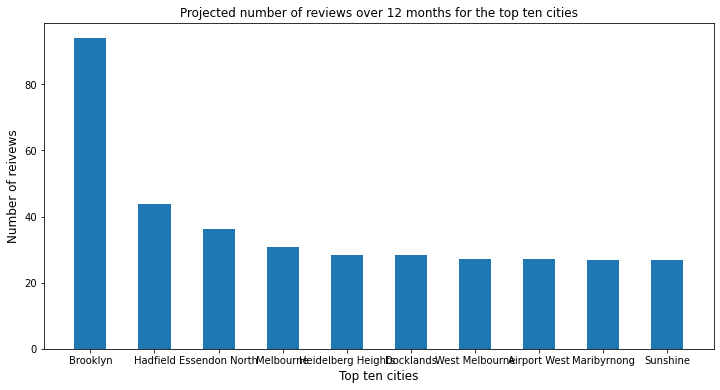

In [16]:
#TOP bar chart

plt.figure(figsize=(12,6))
plt.bar(topx, topy, width=.5,)
plt.title('Projected number of reviews over 12 months for the top ten cities')
plt.xlabel('Top ten cities',fontdict={'fontsize':12})
plt.ylabel('Number of reivews', fontdict={'fontsize':12})

plt.show()

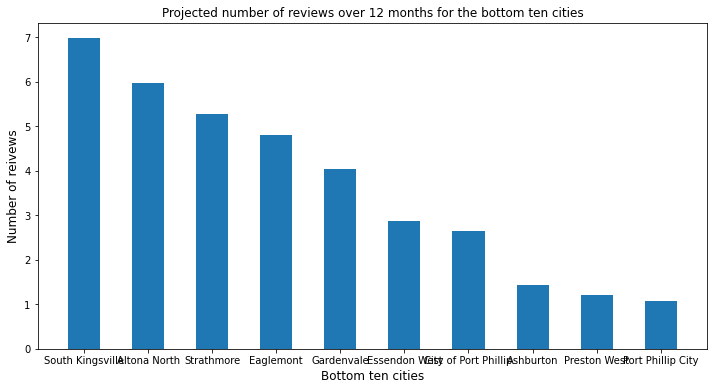

In [17]:
#BOTTOM bar chart

plt.figure(figsize=(12,6))
plt.bar(bottomx, bottomy, width=.5,)
plt.title('Projected number of reviews over 12 months for the bottom ten cities')
plt.xlabel('Bottom ten cities',fontdict={'fontsize':12})
plt.ylabel('Number of reivews', fontdict={'fontsize':12})

plt.show()

<BarContainer object of 10 artists>

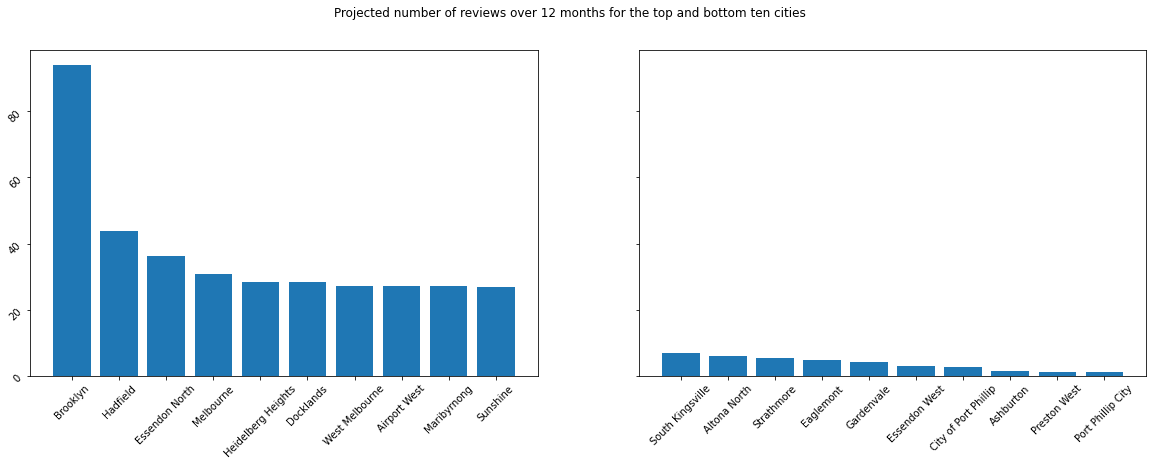

In [18]:
#SUBPLOT BAR CHART
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), sharey=True)


fig.suptitle('Projected number of reviews over 12 months for the top and bottom ten cities')


ax1.bar(topx, topy)

for ax in fig.axes:
    ax.tick_params(labelrotation=45)


ax2.bar(bottomx, bottomy)

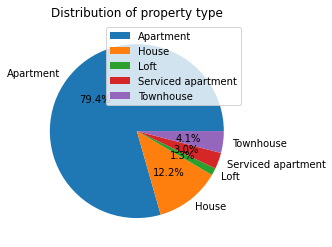

In [19]:

#Generate a pie plot to see the break up of accomodation types
airbnbpropertygroup = airbnbOccStart.groupby(["property_type"])
airbnbpropertycount = airbnbpropertygroup["id"].nunique()
#labels = ["Female", "Male"]

airbnbpropertycount.plot.pie(title='Distribution of property type', autopct="%1.1f%%")
plt.ylabel('')
plt.legend()

In [22]:
#Scatter plot for top ten revenue earners and occupancy

#CREATE X AND Y DATA
#For X axis - create a series of the top ten revenue ammoumts

#X axis needs to be string
#df = df.str[0]

#For Y axis - create a series for occupancy

#Check data
#print(Xseries, Yseries)

In [ ]:
#CREATE SCATTPLOT
 

    #To make a neat x axis labels
#xticks = np.arange(min(Xseries), max(Xeries)+1, 1)

    #Make points larger and transparent to show overlapping points for mice of 17g
#plt.scatter(XSeries, YSeries, s=50, alpha=0.65)
#plt.title('Revenue per person vs occupancy')
#plt.xticks(xticks)
#plt.xlabel('Revenue')
#plt.ylabel('Occupancy')
#plt.show()